In [1]:
import sys
sys.path.insert(0, "../")

from utils import grid_plot
from torch.utils.data import DataLoader
from datasets import get_dataset

import torch
import torch.nn.functional as F
import torchvision

import pandas as pd
import numpy as np

from metrics import swd_metric
from metrics import laplacian_pyramid


# Data

In [7]:
batch_size = 1024

# Imagenet 64x64
imagenet = get_dataset('imagenet64', path="D:\\datasets\\imagenet-64")
imagenet_loader = DataLoader(imagenet, batch_size)
dl = iter(imagenet_loader)
img1 = next(dl)[0]
img2 = next(dl)[0]

# Noise
noise1 = torch.randn(batch_size, 3, 64, 64)
noise2 = torch.randn(batch_size, 3, 64, 64)

# Laplacian Pyramid

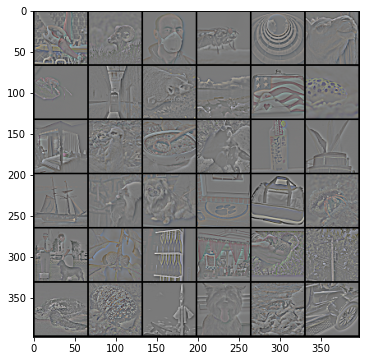

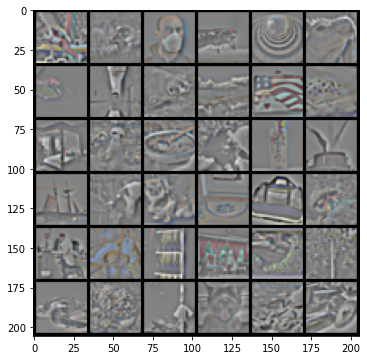

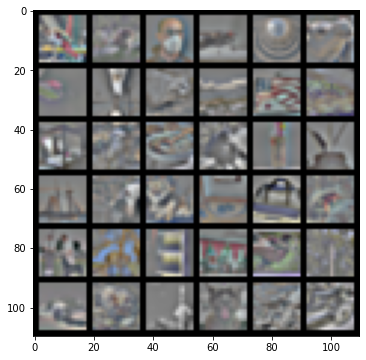

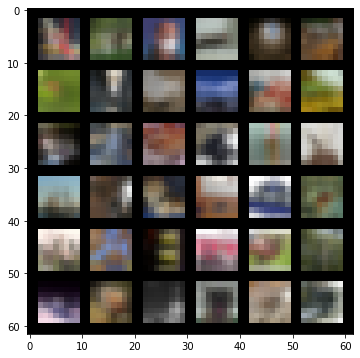

In [9]:
pyramids = laplacian_pyramid(img1[:36], levels=4)
for p in pyramids:
    grid_plot(p)

# Compare distances between same and different distributions

- Noise has smaller base distance, more likely because it is less complex then images. -> we need lot of images to calculate meaningfull distances
- Distance between noise and images is the largest.

In [8]:
# Params
patch_size = 7
n_patches = 128
projection_size = 128
n_projections = 4
device = 'cuda'

image_to_image = swd_metric(img1, img2, n_projections, projection_size, n_patches, patch_size, device)
image_to_noise = swd_metric(img1, noise1, n_projections, projection_size, n_patches, patch_size, device)
noise_to_noise = swd_metric(noise1, noise2, n_projections, projection_size, n_patches, patch_size, device)

print(f'Distance of noise and noise tensors: {noise_to_noise}')
print(f'Distance of image and noise tensors: {image_to_noise}')
print(f'Distance of image and image tensors: {image_to_image}')

Distance of noise and noise tensors: tensor([0.0586, 0.0564, 0.0702])
Distance of image and noise tensors: tensor([2.5670, 1.9376, 2.6066])
Distance of image and image tensors: tensor([0.1648, 0.1446, 0.2380])


# Add noise to image and compare to noise


- Distance decreases as we add noise to image. Image is closer to noise distribution, hence the distance between the two distributions is decreasing

Wall time: 2min 38s


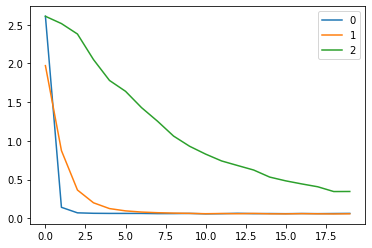

In [10]:
%%time
data = []
for alpha in np.arange(0, 10, 0.5):
    noisy_image = img1 + alpha*noise1
    metric = swd_metric(noisy_image, noise2, n_projections, projection_size, n_patches, patch_size, device)
    data.append(metric.to('cpu').numpy())
df = pd.DataFrame(data)
df.plot()

# Add noise to image and compare to image
- Distance increases as we add noise. Image distribution transforms to pure noise distribution by adding more noise, hence the distance between those distributions increases


Wall time: 2min 41s


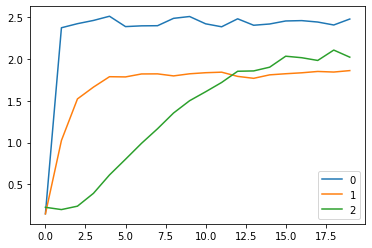

In [11]:
%%time
data = []
for alpha in np.arange(0, 10, 0.5):
    noisy_image = img1 + alpha*noise1
    metric = swd_metric(noisy_image, img2, n_projections, projection_size, n_patches, patch_size, device)
    data.append(metric.to('cpu').numpy())
    
df = pd.DataFrame(data)
df.plot()